##### Data Loading

In [1]:
import argparse
import torch
import pandas as pd
import numpy as np

In [2]:
mnist_training_data = pd.read_csv('http://vast.uccs.edu/~adhamija/mnist_features/train_mnist.csv')
mnist_testing_data = pd.read_csv('http://vast.uccs.edu/~adhamija/mnist_features/test_mnist.csv')

In [3]:
def structure_data(df):
    data = (df.groupby('GT').apply(lambda x: list(map(list, zip(x['Features1'],x['Features2'])))).to_dict())
    for k in data:
        data[k] = torch.Tensor(data[k])
    return data

In [4]:
mnist_training_data=structure_data(mnist_training_data)
mnist_testing_data=structure_data(mnist_testing_data)

##### Feature visualization

In [5]:
from vast.tools import viz

In [6]:
def plot(dict_data, heat_map_fn=None, *args, **kwargs):
    data = torch.cat(list(dict_data.values()), dim=0)
    
    labels = []
    for k in dict_data:
        labels.extend([k]*dict_data[k].shape[0])
    labels=np.array(labels)
    viz.plotter_2D(data.numpy(), labels, final=True, 
                   heat_map=heat_map_fn is not None, 
                   prob_function=heat_map_fn, *args, **kwargs)

/Users/akshayrajdhamija/code/TESTING/vast/vast/tools/viz.py:172: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


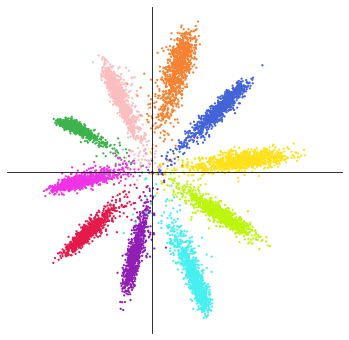

In [7]:
plot(mnist_testing_data)

### Common OOD Processing
All OOD Algorithms provide the per class knowness probability.

Please study the code below to understand the usage, especially for the argparse.

In [8]:
from vast import opensetAlgos

In [9]:
args = None

In [10]:
def common_processing(approach, params):
    global args
    # Getting functions to execute
    param_fn = getattr(opensetAlgos, f'{approach}_Params')
    training_fn = getattr(opensetAlgos, f'{approach}_Training')
    testing_fn = getattr(opensetAlgos, f'{approach}_Inference')
    
    # Create argparse such that it gets all parameters provided by the Algo
    parser = argparse.ArgumentParser()
    parser, algo_params = param_fn(parser)
    args = parser.parse_args(params.split())
    
    # Run the training function
    all_hyper_parameter_models = list(
        training_fn(
            pos_classes_to_process = mnist_training_data.keys(),
            features_all_classes = mnist_training_data,
            args = args,
            gpu = -1, # to run on CPU
            models=None)
    )
    # Assumes that there is only one hyper parameter combination and gets model for that combination
    models=dict(list(zip(*all_hyper_parameter_models))[1])
    # Runs inference and plots the heat map
    plot(mnist_testing_data, heat_map_fn=get_probs, approach=testing_fn, models=models)

In [11]:
def get_probs(pnts, approach, models):
    result = approach(pos_classes_to_process = ('0'),
                      features_all_classes = {'0':torch.tensor(pnts).double()},
                      args = args,
                      gpu = -1,
                      models = models)
    result = torch.cat(list(dict(list(zip(*result))[1]).values()))
    result = torch.max(result, dim=1).values
    return result

#### EVT Recognition / OpenMax

/Users/akshayrajdhamija/code/TESTING/vast/vast/tools/viz.py:172: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


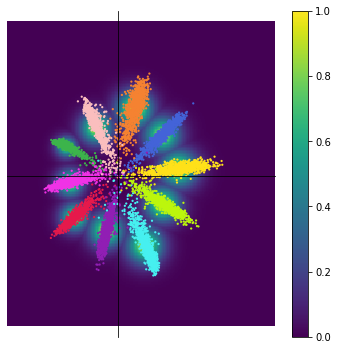

In [12]:
approach = 'OpenMax'
common_processing(approach, params="--distance_metric euclidean")

/Users/akshayrajdhamija/code/TESTING/vast/vast/tools/viz.py:172: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


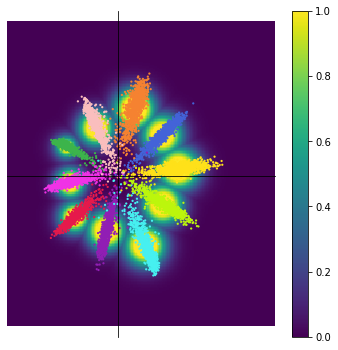

In [13]:
approach = 'OpenMax'
common_processing(approach, params="--distance_metric euclidean --tailsize 0.5")

/Users/akshayrajdhamija/code/TESTING/vast/vast/tools/viz.py:172: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


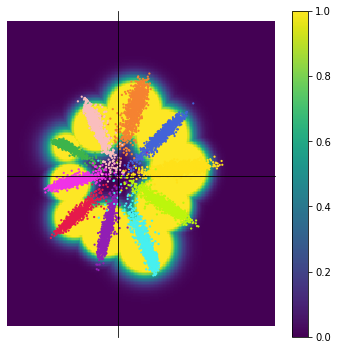

In [14]:
approach = 'OpenMax'
common_processing(approach, params="--distance_metric euclidean --tailsize 0.1")

#### EVM

/Users/akshayrajdhamija/code/TESTING/vast/vast/tools/viz.py:172: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


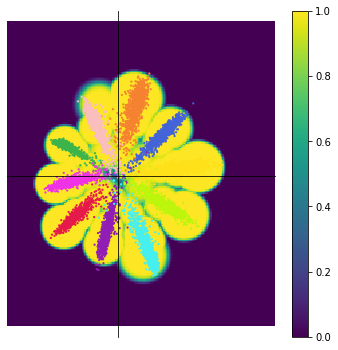

In [15]:
approach = 'EVM'
common_processing(approach, params="--distance_metric euclidean")

/Users/akshayrajdhamija/code/TESTING/vast/vast/tools/viz.py:172: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


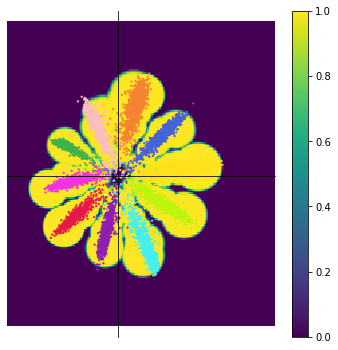

In [16]:
approach = 'EVM'
common_processing(approach, params="--distance_metric euclidean --tailsize 0.1")

### MultiModal OpenMax

/Users/akshayrajdhamija/code/TESTING/vast/vast/clusteringAlgos/FINCH/python/finch.py:13: UserWarning: pyflann not installed: No module named 'pyflann'
  warnings.warn('pyflann not installed: {}'.format(e))
/Users/akshayrajdhamija/code/TESTING/vast/vast/tools/viz.py:172: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


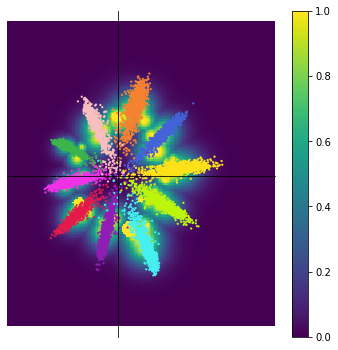

In [17]:
approach = 'MultiModalOpenMax'
common_processing(approach, params="--distance_metric euclidean --tailsize 1.0")